$$f(x) = 2 \cos\left(2.5x\right) e^{x/3} + 4 \sin\left(3.5x\right) e^{−3x} + x$$

$$a=1.5, b=3.3, \alpha=\dfrac{1}{3}, \beta=0$$

Для заданного набора значений параметров вычислить интеграл 
$$\int_{a}^{b}\dfrac{f(x)}{(x-a)^α(x-b)^β}\ dx$$

с заданной точностью ε с использованием двух типов формул. Найти
«точное» значение интеграла для сверки получаемых численных результатов с помощью какой-нибудь компьютерной системы научных
вычислений.

###Вариант Ньютона — Котса
* Построить интерполяционную квадратурную формулу с весовой функцией $$p(x) = (x − a)^{-α}(b − x)^{-β}$$ на отрезке $[a, b]$ по трём равномерно распределённым узлам $x_1 = a, x_2 = (a+b)/2, x_3 = b$. Оценить методическую погрешность построенного правила, сравнить её с точной погрешностью.
* На базе построенной малой ИКФ построить составную КФ и, уменьшая длину шага h, добиться заданной точности $ε = 10^{−6}$. Погрешность оценивать методом Ричардсона. На каждых последовательных трёх сетках оценивать скорость сходимости по правилу Эйткена.
* Проведя вычисления по трём грубым сеткам с малым числом шагов (например, 1, 2 и 4) использовать оценку скорости сходимости и выбрать оптимальный шаг $h_{opt}$. Начать расчёт c шага $h_{opt}$ и снова довести до требуемой точности ε.

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn
seaborn.set_theme()

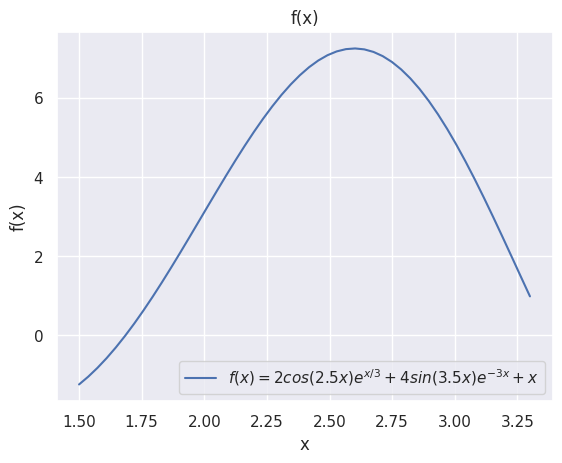

In [ ]:
def f(x):
    return 2*np.cos(2.5*x)*np.exp(x/3) + 4*np.sin(3.5*x)*np.exp(-3*x) + x
a, b, N = 1.5, 3.3, 50
x = np.linspace(a, b, N)
y = [f(i) for i in x]

plt.plot(x, y, label="$f(x) = 2cos(2.5x)e^{x/3} + 4sin(3.5x)e^{−3x} + x$")
plt.xlabel('x')
plt.ylabel('f(x)');
plt.title('f(x)')
plt.legend(loc='best');

<ipython-input-19-3bf5531f5280>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return (2*np.cos(2.5*x)*np.exp(x/3) + 4*np.sin(3.5*x)*np.exp(-3*x) + x) / (x - 1.5)**(1/3)


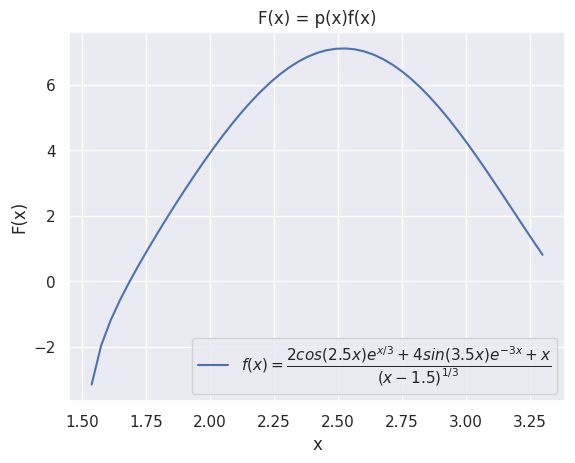

In [ ]:
def F(x):
    return (2*np.cos(2.5*x)*np.exp(x/3) + 4*np.sin(3.5*x)*np.exp(-3*x) + x) / (x - 1.5)**(1/3)
x = np.linspace(a, b, N)
y_F = [F(i) for i in x]

plt.plot(x, y_F, label="$f(x) = \dfrac{2cos(2.5x)e^{x/3} + 4sin(3.5x)e^{−3x} + x}{(x-1.5)^{1/3}}$")
plt.xlabel('x')
plt.ylabel('F(x)');
plt.title('F(x) = p(x)f(x)')
plt.legend(loc='best');

In [ ]:
def moment(i, a, b):
    res0 = ((b - 1.5)**(1-(1/3)) - (a - 1.5)**(1-(1/3))) / (1-(1/3))
    res1 = (((b - 1.5)**(2-(1/3)) - (a - 1.5)**(2-(1/3))) / (2-(1/3))) + 1.5*res0
    res2 = (((b - 1.5)**(3-(1/3)) - (a - 1.5)**(3-(1/3))) / (3-(1/3))) + 2*1.5*res1 - (1.5**2)*res0
    if i == 0: return res0
    elif i == 1: return res1
    elif i == 2: return res2

In [ ]:
def Newton_Cotes(n, a, b):
    s = 0
    nodes = np.linspace(a, b, n)
    h = (b-a)/n
    
    for i in range(1, len(nodes)):
        c = np.array([
            [1, 1, 1],
            [a+(i-1)*h, a+(i-0.5)*h, a+i*h],
            [(a+(i-1)*h)**2, (a+(i-0.5)*h)**2, (a+i*h)**2]
        ])
        m_vec = np.array([
            [moment(0, a+(i-1)*h, a+(i)*h)],
            [moment(1, a+(i-1)*h, a+(i)*h)],
            [moment(2, a+(i-1)*h, a+(i)*h)]
        ])
        A = np.linalg.solve(c, m_vec)
        s += float(A[0]*f(a+(i-1)*h) + A[1]*f(a+(i-0.5)*h) + A[2]*f(a+i*h))
    
    return s

In [ ]:
print(Newton_Cotes(3, a, b))

4.637315651200974


###Вариант Гаусса
Выполнить всё то же самое, используя трёхточечные формулы Гаусса вместо формул Ньютона — Котса. Узлы каждой малой формулы
находить либо с помощью формул Кардано, либо численно.